<a href="https://colab.research.google.com/github/manith506/projects/blob/main/Netflix_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX DATA ANALYSIS AND VISUVALIZATION**

## Downloading the data

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 46.7MB/s]


## Importing necessary libraries and loading data set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/netflix.csv')

## Analysing the dataset

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
### Obtaining information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
### converting 'date_added' column to a datetime format and creating new columns
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added_month'] = df['date_added'].dt.month_name()
df['date_added_year'] = df['date_added'].dt.year

In [ ]:
df['date_added'].dtype

dtype('<M8[ns]')

## handling missing values and Duplicates

In [ ]:
### checking for missing values in dataset
df.isnull().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               3
listed_in              0
description            0
date_added_month      10
date_added_year       10
dtype: int64

In [ ]:
### checking for duplicate rows in fdataset
df.duplicated().sum()

0

In [ ]:
### Replacing missing values in the 'director' column with 'No Data Found'
df['director'].replace(np.nan , 'No Data Found', inplace = True)

### Replacing missing values in the 'cast' column with 'No Data Found'
df['cast'].replace(np.nan , 'No Data Found', inplace = True)

### Replacing missing values in the 'country' column with 'No Data Found'
df['country'].replace(np.nan , 'No Data Found', inplace = True)

In [ ]:
### Finding the mode rating for movies and TV shows
movie_ratings = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_ratings = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

### Filling missing rating values based on the type of content
df['rating'] = df.apply(lambda i: movie_ratings if i['type'] == 'Movie' and pd.isna(i['rating'])
                            else tv_ratings if i['type'] == 'TV Show' and pd.isna(i['rating'])
                            else i['rating'], axis=1)

In [ ]:
### dropping remaining missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
date_added_month    0
date_added_year     0
dtype: int64

In [ ]:
df['date_added_year'] = df['date_added_year'].astype(int)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data Found,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data Found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data Found,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data Found,No Data Found,No Data Found,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data Found,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


In [ ]:
df.shape

(8794, 14)

## Data transformation(Cast, Country, Listed In, and Director)


In [ ]:
### Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',' , expand=True).stack()
df_cast = df_cast.reset_index(level=1 , drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']
df_cast.head()

,cast,show_id
0,No Data Found,s1
1,Ama Qamata,s2
1,Khosi Ngema,s2
1,Gail Mabalane,s2
1,Thabang Molaba,s2


In [ ]:
### Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']
df_country.head()

,country,show_id
0,United States,s1
1,South Africa,s2
2,No Data Found,s3
3,No Data Found,s4
4,India,s5


In [ ]:
### Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']
df_listed_in.head()

,listed_in,show_id
0,Documentaries,s1
1,International TV Shows,s2
1,TV Dramas,s2
1,TV Mysteries,s2
2,Crime TV Shows,s3


In [ ]:
### Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']
df_director.head()

,director,show_id
0,Kirsten Johnson,s1
1,No Data Found,s2
2,Julien Leclercq,s3
3,No Data Found,s4
4,No Data Found,s5


## Exploratory Data Analysis

### distribution of content type

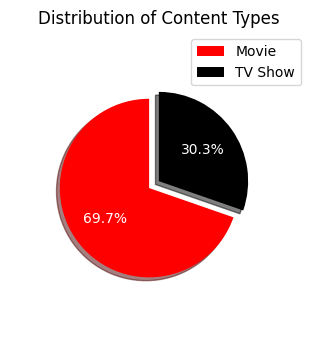

In [ ]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y) * 100).round(2)


content_ratio = pd.DataFrame(r)
content_ratio.rename({'type' : 'Percentage_%'},axis=1, inplace=True)


plt.figure(figsize=(3.5,3.5))
plt.pie(content_ratio['Percentage_%'], labels = content_ratio.index, colors = ['red', 'black'],
        startangle= 90, explode = (0.1, 0), shadow = True, autopct='%1.1f%%',
        textprops={'color' : 'white'}, radius = 0.75)

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.tight_layout()
plt.show()

### Top 10 Contries where Netflix is popular

In [ ]:
df_country = df_country['country'].str.strip()

In [ ]:
df_country = df_country.to_frame('country')

In [ ]:
null_countries = df_country[df_country['country'] == 'No Data Found'].index
df_country.drop(null_countries, inplace = True)

In [ ]:
df_country.value_counts()
top_10_countries = df_country.value_counts().head(10)
top_10_countries

country       
United States     3681
India             1046
United Kingdom     805
Canada             445
France             393
Japan              317
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

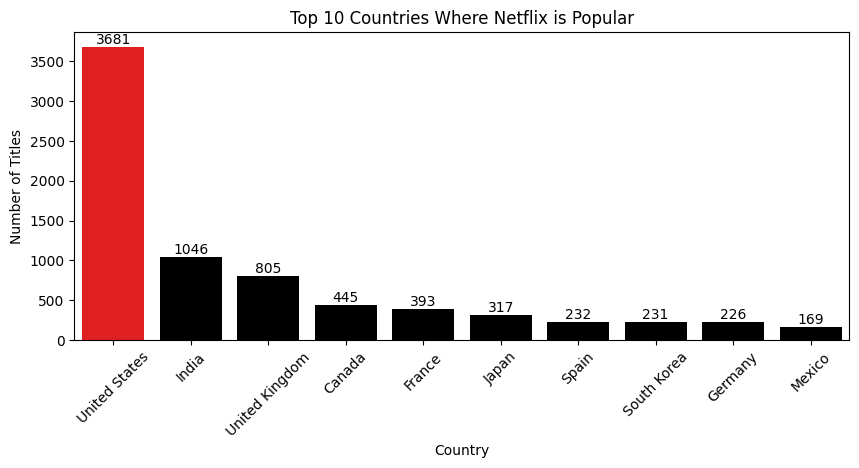

In [ ]:
plt.figure(figsize = (10,4))
colors = ['red'] + ['black'] * (len(top_10_countries) - 1)
bar_plot = sns.barplot( x = top_10_countries.index.get_level_values(0) , y = top_10_countries.values, palette = colors,
            hue = top_10_countries.index.get_level_values(0), legend = False)

plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.title('Top 10 Countries Where Netflix is Popular')


for index, value in enumerate(top_10_countries):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Top 10 Actors by Movie/TV Show Count

In [ ]:
df_cast['cast'] = df_cast['cast'].str.strip()

In [ ]:
cast_count = df_cast['cast'].value_counts()[1:]
top_10_cast = cast_count.head(10)
top_10_cast

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

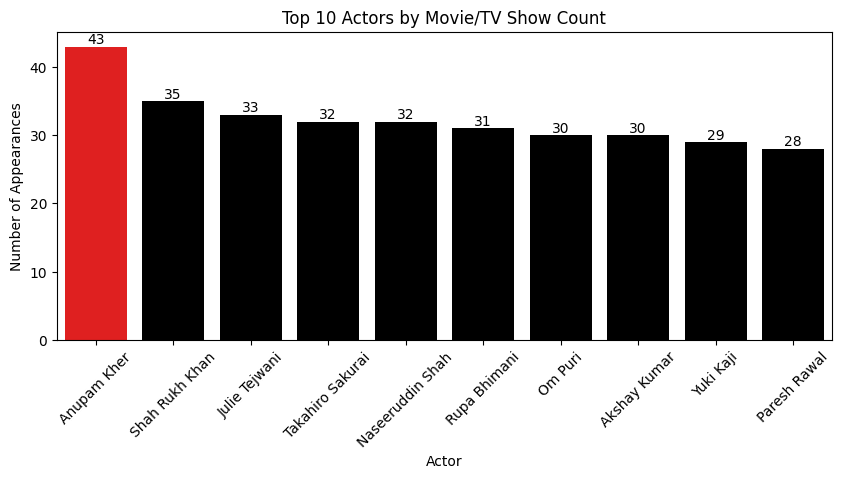

In [ ]:
plt.figure(figsize = (10,4))
colors = ['red'] + ['black'] * (len(top_10_cast) - 1)
bar_plot = sns.barplot( x = top_10_cast.index.get_level_values(0) , y = top_10_cast.values, palette = colors,
            hue = top_10_cast.index.get_level_values(0), legend = False)

plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Actors by Movie/TV Show Count')
plt.xticks(ticks = range(len(top_10_cast.index)), labels = top_10_cast.index, rotation = 45)

for index, value in enumerate(top_10_cast):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Top 10 Directors by Movie/TV Show Count

In [ ]:
df_director['director'] = df_director['director'].str.strip()

In [ ]:
director_count = df_director['director'].value_counts()[1:]
top_10_directors = director_count.head(10)
top_10_directors

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: director, dtype: int64

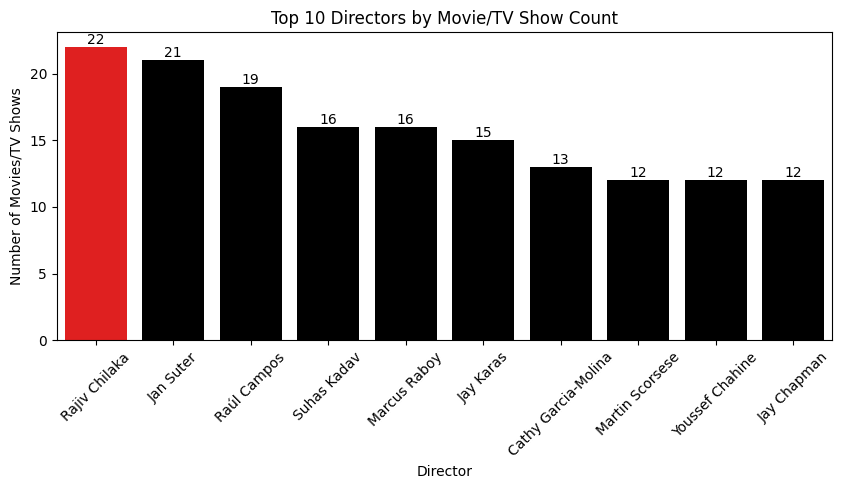

In [ ]:
plt.figure(figsize = (10,4))
colors = ['red'] + ['black'] * (len(top_10_directors) - 1)
bar_plot = sns.barplot( x = top_10_directors.index.get_level_values(0) , y = top_10_directors.values, palette = colors,
            hue = top_10_directors.index.get_level_values(0), legend = False)

plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Directors by Movie/TV Show Count')
plt.xticks(ticks = range(len(top_10_directors.index)), labels = top_10_directors.index, rotation = 45)

for index, value in enumerate(top_10_directors):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Top 10 Categories by Movie/TV Show Count

In [ ]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()

In [ ]:
listin_counts = df_listed_in['listed_in'].value_counts()
top_10_listed_in = listin_counts.head(10)
top_10_listed_in

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

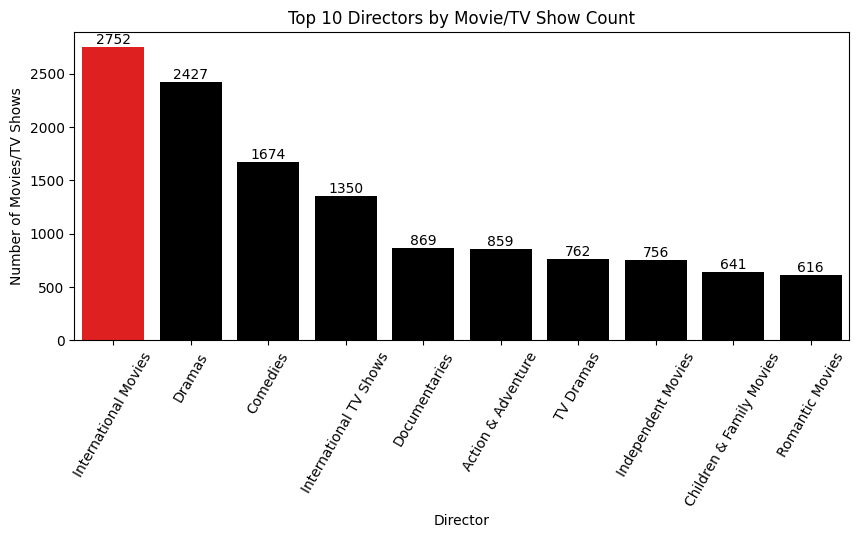

In [ ]:
plt.figure(figsize = (10,4))
colors = ['red'] + ['black'] * (len(top_10_listed_in) - 1)
bar_plot = sns.barplot( x = top_10_listed_in.index.get_level_values(0) , y = top_10_listed_in.values, palette = colors,
            hue = top_10_listed_in.index.get_level_values(0), legend = False)

plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Directors by Movie/TV Show Count')
plt.xticks(ticks = range(len(top_10_listed_in.index)), labels = top_10_listed_in.index, rotation = 60)

for index, value in enumerate(top_10_listed_in):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### Movies & TV Shows Added Over Time

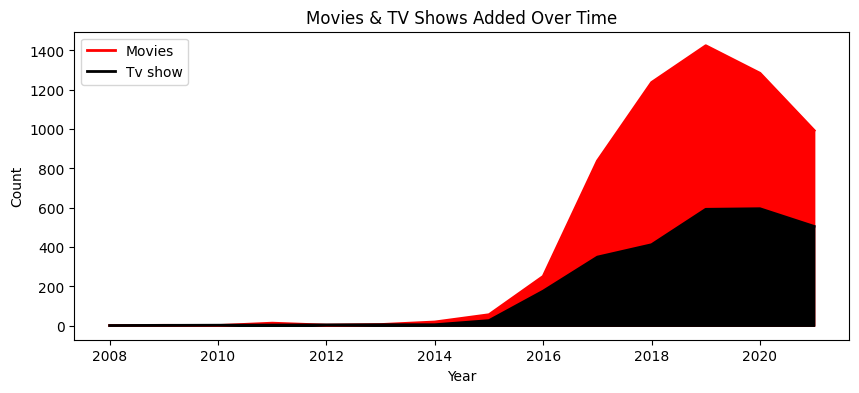

In [ ]:
# Filter the DataFrame to include only Movies and TV Shows
df_movies = df[df['type'] == 'Movie']
df_tvshows = df[df['type'] == 'TV Show']


movies_count = df_movies['date_added_year'].value_counts().sort_index()
tvshow_count = df_tvshows['date_added_year'].value_counts().sort_index()

plt.figure(figsize = (10,4))
plt.plot(movies_count.index, movies_count.values, color = 'red', label = 'Movies', linewidth = 2)
plt.plot(tvshow_count.index, tvshow_count.values, color = 'black', label = 'Tv show', linewidth = 2)

plt.fill_between(movies_count.index, movies_count.values, color = 'red')
plt.fill_between(tvshow_count.index, tvshow_count.values, color = 'black')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()

plt.show()

### Content Added by Month

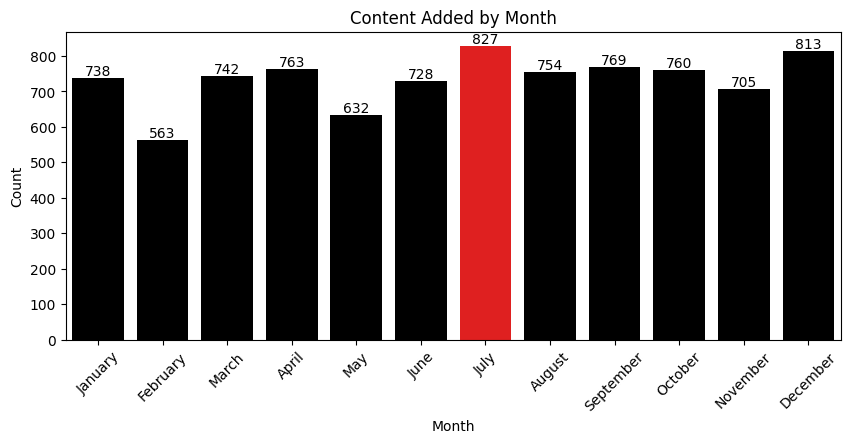

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']


monthly_counts = df['date_added_month'].value_counts().loc[month_order]


max_count = monthly_counts.max()
colors = ['red' if count == max_count else 'black' for count in monthly_counts]

plt.figure(figsize = (10,4))
bar_plot = sns.barplot(x = monthly_counts.index.get_level_values(0), y = monthly_counts.values, palette = colors,
                        hue = monthly_counts.index.get_level_values(0), legend = False)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')
plt.xticks(rotation=45)

for index, value in enumerate(monthly_counts.values):
    bar_plot.text(index, value, str(value), ha = 'center', va = 'bottom')

plt.show()

### Distribution of Rating

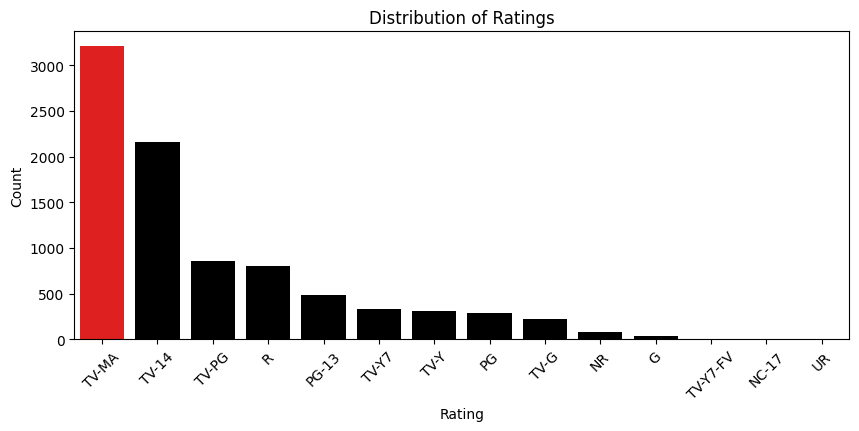

In [ ]:
rating_counts = df['rating'].value_counts()


plt.figure(figsize=(10, 4))
colors = ['red'] + ['black'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors, hue= rating_counts.index, legend= False)


plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')


plt.xticks(rotation=45)

plt.show()

### Genre Correlation Heatmap

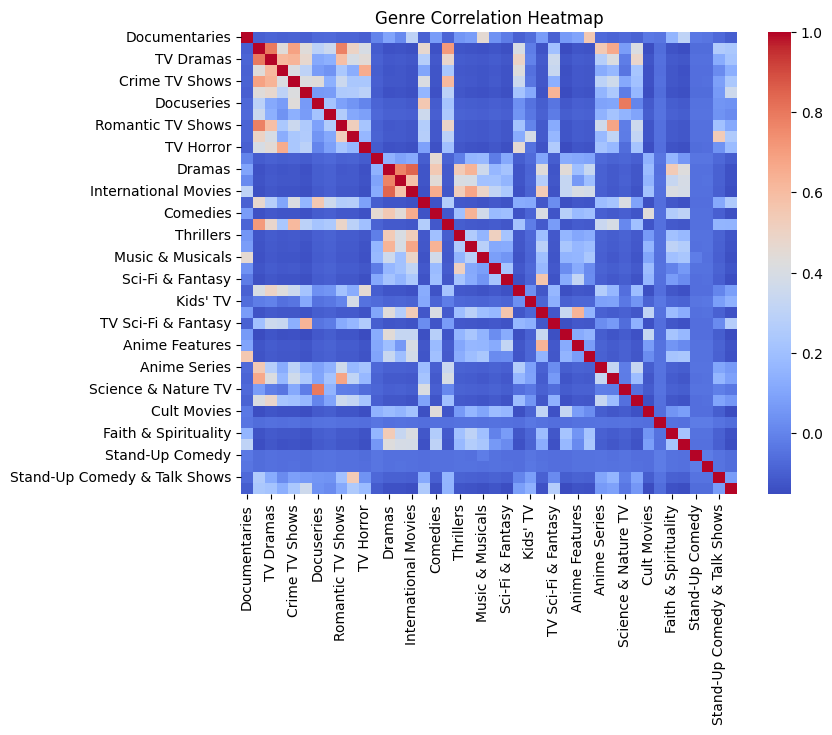

In [ ]:
genre = df_listed_in['listed_in'].unique()
genre_data = pd.DataFrame(index = genre, columns = genre, dtype = float)

genre_data.fillna(0, inplace = True)

for _, row in df.iterrows():
    listed_in = row['listed_in'].split(', ')
    for genre1 in listed_in:
        for genre2 in listed_in:
            genre_data.at[genre1, genre2] += 1

correlation = genre_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Genre Correlation Heatmap')

plt.show()

### Distribution of Movie Lengths and TV Show Episode Counts

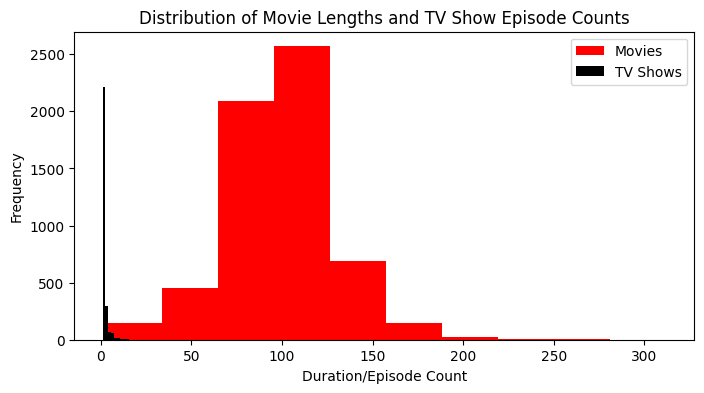

In [ ]:
movie_lengths = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)
tv_show_episodes = df_tvshows['duration'].str.extract('(\d+)', expand=False).astype(int)


plt.figure(figsize=(8, 4))
plt.hist(movie_lengths, bins=10, color='red', label='Movies')
plt.hist(tv_show_episodes, bins=10, color='black', label='TV Shows')

plt.xlabel('Duration/Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths and TV Show Episode Counts')
plt.legend()

plt.show()

### The Trend of Movie/TV Show Lengths Over the Years

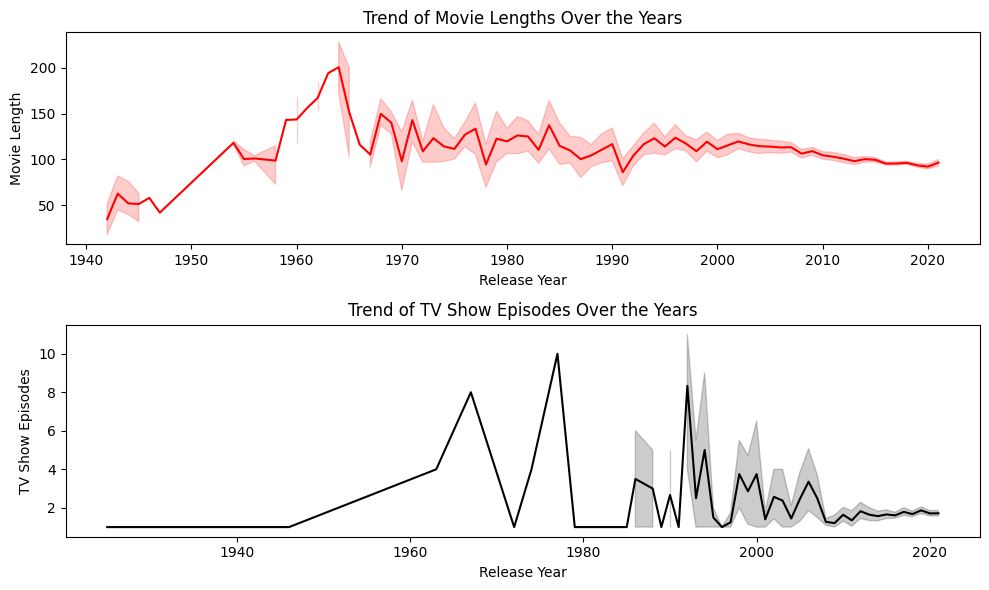

In [ ]:
plt.figure(figsize = (10,6))

plt.subplot(2,1,1)
sns.lineplot(data = df_movies, x='release_year', y = movie_lengths, color = 'red')
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')

plt.subplot(2,1,2)
sns.lineplot(data=df_tvshows, x='release_year', y=tv_show_episodes,color='black')
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')

plt.tight_layout()


plt.show()

### Most Common Words in Titles and Descriptions

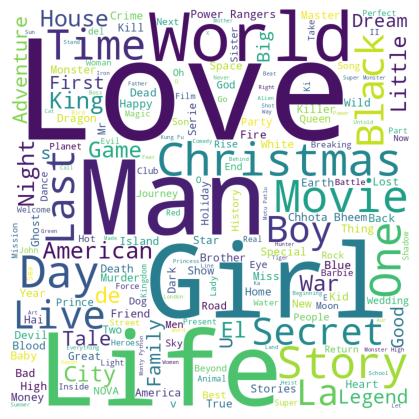

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['title'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)


plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

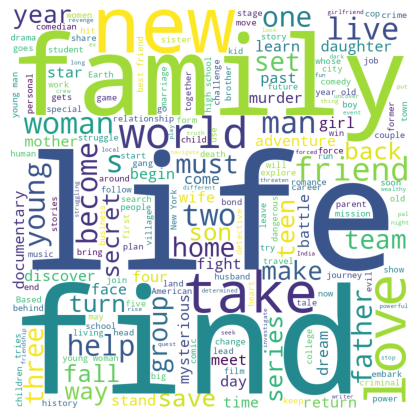

In [ ]:
text = ' '.join(df['description'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

plt.figure(figsize=(4,4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Duration Distribution for Movies and TV Shows

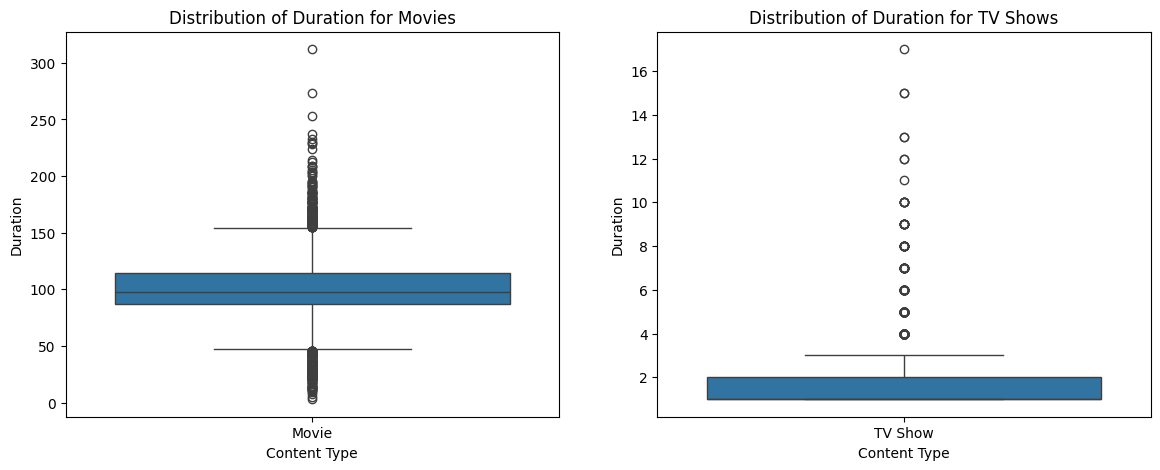

In [ ]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.boxplot(data = df_movies, x = 'type', y = movie_lengths)
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')

plt.subplot(1,2,2)
sns.boxplot(data = df_tvshows, x = 'type', y = tv_show_episodes)
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')


plt.show()


# **Actionable Insights and Conclusion**

With the help of EDA, we can conclude that



*   **Quantity** : Our findings indicate that Netflix significantly expanded its movie collection compared to its TV show offerings, aligning with the expectation that movies dominate their content library.

*   **Content Addition** : July emerged as the month when Netflix adds the most content, closely followed by December, indicating a strategic approach to content release.

*   **Genre Correlation** : Strong positive associations were observed between various genres, such as TV dramas and international TV shows, romantic and TV dramas, science and nature with Docuseries and independent movies and dramas. These correlations provide insights into viewer preferences and content interconnections.

*   **Movie Lengths** : The analysis of movie durations indicated a peak around the 1960s, followed by a stabilization around 100 minutes, highlighting a trend in movie lengths over time.

*   **TV Show Episodes** : Most TV shows on Netflix have one season, suggesting a preference for shorter series among viewers.

*   **Common Themes** : Words like love, life, family, and adventure were frequently found in titles and descriptions, capturing recurring themes in Netflix content.

*   **Rating Distribution** : Changes in ratings over time show how content and audience opinions have evolved.

Our data analysis journey showcased the power of data in unraveling the mysteries of Netflix's content landscape, providing valuable insights for viewers and content creators.As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.






